'\nTak, dochodzi do zjawiska przecieku widma ponieważ zamiast prostych kresek w spodziewanych częstotliwościach \nmamy jeszcze "rozlewanie" się mocy wokół spodziewanych częstotliwości. \nZwiększenie ilości próbek pozytywnie wpływa na redukcję przecieku widma, ponieważ wydłużamy czas obserwacji sygnału.\nZjawisko zapewne wtedy też występuje, ale jest o wiele mniej zauważalne.\n'

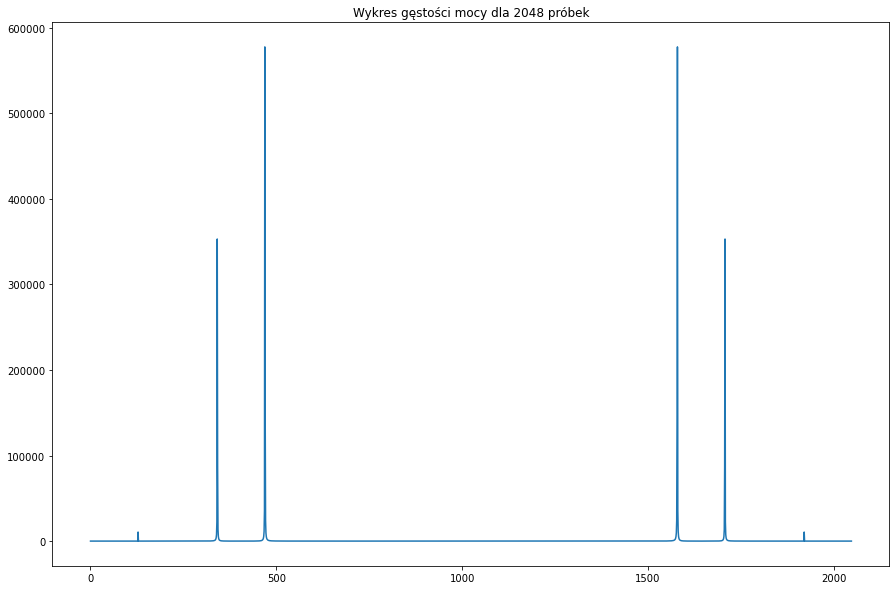

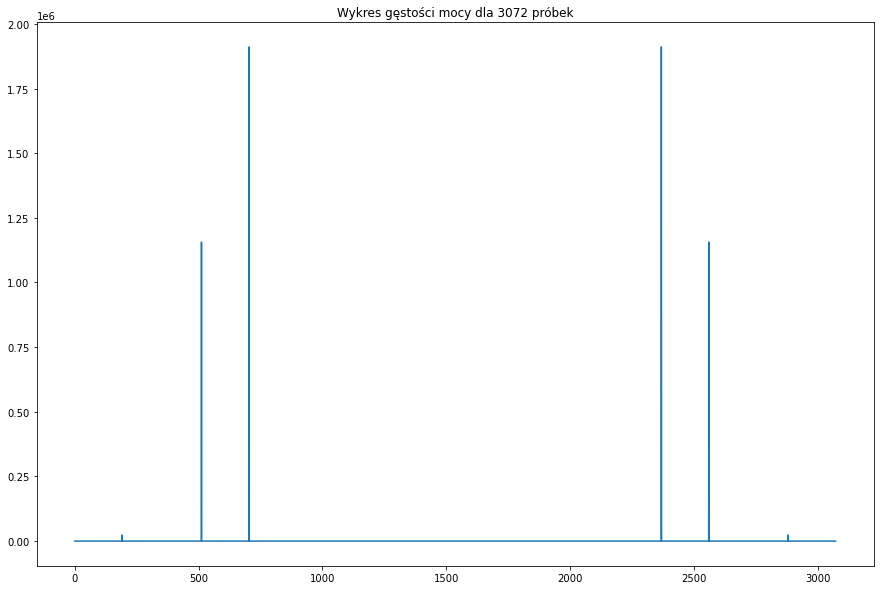

In [2]:
# Zad. 4
'''
Dany jest sygnał rzeczywisty s(t) = A1 sin(2πf_1 *t) + A2 sin(2πf_2*t) + A3 sin(2πf_3*t) , gdzie A1 =
0.1 , f1 = 3000 Hz, A2 = 0.7 , f2 = 8000 Hz, A3 = 0.9 , f3 = 11000 Hz. Przy założeniu, że
częstotliwość próbkowania wynosi fs = 48000 Hz, a liczba próbek sygnału wynosi N1 = 2048 ,
przedstawić wykres widmowej gęstości mocy sygnału spróbkowanego. Czy dla podanej liczby próbek
mamy do czynienia ze zjawiskiem przecieku widma? Czy sytuacja uległaby zmianie dla liczby próbek
N2 = 3/2 N1 ? Odpowiedź uzasadnić.
'''
from math import sin, pi
import numpy as np
from numpy.fft import fft
import matplotlib.pyplot as plt

A1 = 0.1
f1 = 3000
A2 = 0.7
f2 = 8000
A3 = 0.9
f3 = 11000

fs = 48000
N1 = 2048
N2 = int(3/2 * N1)

def s(t):
    return A1 * sin(2*pi*f1*t) + A2 * sin(2*pi*f2*t) + A3 * sin(2*pi*f3*t)

def get_samples(N):
    sampling_time = 1/fs
    samples = []
    time = 0
    for n in range(N):
        sample = s(time)
        samples.append(sample)
        time += sampling_time
    return samples

samples_n1 = get_samples(N1)
samples_n2 = get_samples(N2)

def calc_density_spectrum(samples):
    dft = fft(samples)
    density_spectrum = np.abs(dft)
    density_spectrum = np.power(density_spectrum, 2)
    return density_spectrum

density_spectrum_n1 = calc_density_spectrum(samples_n1)
density_spectrum_n2 = calc_density_spectrum(samples_n2)

plt.figure(figsize=(15, 10))
plt.plot(density_spectrum_n1)
plt.title(f"Wykres gęstości mocy dla {N1} próbek")

plt.figure(figsize=(15, 10))
plt.plot(density_spectrum_n2)
plt.title(f"Wykres gęstości mocy dla {N2} próbek")

'''
Tak, dochodzi do zjawiska przecieku widma ponieważ zamiast prostych kresek w spodziewanych częstotliwościach 
mamy jeszcze "rozlewanie" się mocy wokół spodziewanych częstotliwości. 
Zwiększenie ilości próbek pozytywnie wpływa na redukcję przecieku widma, ponieważ wydłużamy czas obserwacji sygnału.
Zjawisko zapewne wtedy też występuje, ale jest o wiele mniej zauważalne.
'''
